## **Data Ingestion**

In [2]:
import sys
sys.path.append('../')

!pwd

/c/Users/Vladimir/Desktop/Everything/Work/ARLIS/development/incubator-flagon-distill/prototypes


In [3]:
!ls

__pycache__
data1
data2
data3
helpers.py
model.pth
model_2.pth
model_3.pth
Prototype 1.ipynb
Prototype 2.ipynb
Prototype 3.ipynb
Prototype 4.ipynb


In [4]:
import datetime
import distill
import json
import networkx as nx
import os
import pandas as pd
import plotly.express as px
import re
from helpers import *

In [5]:
def get_file_paths(directory_path):
    path_list = []
    for root, directories, files in os.walk(directory_path):
        for file in files:
            # Different workflow needed for Amir next time
            # Need to ensure sessionID is updating in Madeline's logs
            if file != "logs_nome_amir.json" and (not "Logs-Workflow3" in file):
                path = os.path.join(root, file)
                path_list.append(path)
    return path_list

liam_vlad_dir = (os.getcwd() + '/data3') # Note: Sundial did not work
liam_vlad = get_file_paths(liam_vlad_dir)
all_paths = [path.replace("\\", "/") for path in liam_vlad]

print("File Paths:")
for path in all_paths:
    print(path)


File Paths:
C:/Users/Vladimir/Desktop/Everything/Work/ARLIS/development/incubator-flagon-distill/prototypes/data3/logs_nome_liam.json
C:/Users/Vladimir/Desktop/Everything/Work/ARLIS/development/incubator-flagon-distill/prototypes/data3/logs_nome_vlad.json


In [6]:
def combine_json_to_dataframe(file_paths):
    data_list = []
    for file_path in file_paths:
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
            data_list.append(data)

    combined_data = pd.concat([pd.DataFrame(data) for data in data_list], ignore_index=True)
    return combined_data

df = combine_json_to_dataframe(all_paths)
# df = pd.read_json("data3/logs_nome_vlad.json")
df.head()

,target,path,pageUrl,pageTitle,pageReferrer,browser,clientTime,microTime,location,scrnRes,type,logType,userAction,details,userId,toolVersion,toolName,useraleVersion,sessionID
0,Window,[Window],https://nome.vgihub.geointservices.io/way/1434...,Way: ‪Reckord Armory‬ (‪143466875‬) | MapEdit,https://nome.vgihub.geointservices.io/,"{'browser': 'firefox', 'version': '114.0.0'}",1688062434247,0.0,"{'x': None, 'y': None}","{'width': 1440, 'height': 489}",resize,raw,True,"{'width': 1453, 'height': 865}",nobody,None,test_app,2.3.0,session_1688062135244
1,div#map.leaflet-container leaflet-touch leafle...,[div#map.leaflet-container leaflet-touch leafl...,https://nome.vgihub.geointservices.io/way/1434...,Way: ‪Reckord Armory‬ (‪143466875‬) | MapEdit,https://nome.vgihub.geointservices.io/,"{'browser': 'firefox', 'version': '114.0.0'}",1688062437423,0.0,"{'x': 756, 'y': 314}","{'width': 1440, 'height': 489}",click,raw,True,"{'clicks': 1, 'ctrl': False, 'alt': False, 'sh...",nobody,None,test_app,2.3.0,session_1688062135244
2,NaN,NaN,https://nome.vgihub.geointservices.io/way/1434...,Way: ‪Reckord Armory‬ (‪143466875‬) | MapEdit,https://nome.vgihub.geointservices.io/,"{'browser': 'firefox', 'version': '114.0.0'}",1688062437461,NaN,NaN,"{'width': 1440, 'height': 489}",viewChange,custom,True,"{'zoom': '18', 'latitude': '38.98564', 'longit...",nobody,None,test_app,2.3.0,session_1688062135244
3,path.[object SVGAnimatedString],"[path.[object SVGAnimatedString], g.[object SV...",https://nome.vgihub.geointservices.io/way/1434...,Way: ‪Reckord Armory‬ (‪143466875‬) | MapEdit,https://nome.vgihub.geointservices.io/,"{'browser': 'firefox', 'version': '114.0.0'}",1688062440642,0.0,"{'x': 554, 'y': 269}","{'width': 1440, 'height': 489}",click,raw,True,"{'clicks': 1, 'ctrl': False, 'alt': False, 'sh...",nobody,None,test_app,2.3.0,session_1688062135244
4,NaN,NaN,https://nome.vgihub.geointservices.io/way/2340...,Way: ‪McKeldin Library‬ (‪23408799‬) | MapEdit,https://nome.vgihub.geointservices.io/,"{'browser': 'firefox', 'version': '114.0.0'}",1688062441543,NaN,NaN,"{'width': 1440, 'height': 489}",visit,custom,True,"{'class': 'Way', 'id': '23408799', 'name': 'Mc...",nobody,None,test_app,2.3.0,session_1688062135244


In [7]:
print(df.columns)
print( type(df['details']) )
print( type(df['details'].iloc[-1]) )
print( (df['details'].iloc[-1]) )

Index(['target', 'path', 'pageUrl', 'pageTitle', 'pageReferrer', 'browser',
       'clientTime', 'microTime', 'location', 'scrnRes', 'type', 'logType',
       'userAction', 'details', 'userId', 'toolVersion', 'toolName',
       'useraleVersion', 'sessionID'],
      dtype='object')
<class 'pandas.core.series.Series'>
<class 'dict'>
{'active': True, 'audible': False, 'incognito': False, 'index': 2, 'muted': False, 'pinned': False, 'selected': True, 'tabId': 691774691, 'title': '', 'url': '', 'windowId': 691774592}


## Preprocessing

In [8]:
# def get_partition(log, partition_elements):
#     # A list of the identical matches between what's in the path and color_dict keys
#     partition = list(set(log['path']) & set(partition_elements))
#     if len(partition) == 1:
#         return partition[0]
#     if len(partition) == 0:
#         return "Other"
#     print("uh oh")
#     return "uh oh"

def get_partition(log, partition_elements):
    name = log['details']['name']
    if name in set(partition_elements):
        return name
    else:
        return "Other"
    print("uh oh")
    return "uh oh"

Note from 6/16/23 meeting: Paths for annotations will be the same, but further log data will allow us to differentiate. Purpose is to be able to trace back to the path, regardless how relevant that path is

Prev path graph code

In [12]:
# def get_color_graph(log_dict, color_dict, partition_func):
#     targets = []
#     partition_dict = {}
#     label_dict = {}
#     for log in log_dict.values():
#         # Append this log's path as a string, to targets
#         targets.append(''.join(log['path'])) #This is the path as a string
#         # {this path : partition type ('Other' or 'div-leaflet-pane')}
#         partition_dict[targets[-1]] = partition_func(log, color_dict.keys())
#         # {this path : log's label}
#         label_dict[targets[-1]] = log['target']
        
#     # Make a pairwise list of the logs' paths as edges
#     edges = list(nx.utils.pairwise(targets))

#     # x and y are the nodes connected by the edge, and v is the capacity of the edge
#     graph = nx.DiGraph((x, y, {'capacity': v}) for (x, y), v in collections.Counter(edges).items())
#     # Sets partition and label attributes for each node in the graph
#     nx.set_node_attributes(graph, partition_dict, "partition")
#     nx.set_node_attributes(graph, label_dict, "label")
#     # Sets node values according to the partition of the node's log
#     colors = [color_dict[p] for p in nx.get_node_attributes(graph, "partition").values()]
#     # Returns a tuple containing the constructed graph (graph) and the list of colors (colors)
#     return (graph, colors)

# def setup(file, date_type):
#     with open(file) as json_file:
#         raw_data = json.load(json_file)

#     # Data = {sessionID : {logUUID : log}}
#     data = {}
#     curr_sess = {}
#     curr_id = next(iter(raw_data))['sessionID']
#     # For each log of type 'click' ('visit' logs don't have paths), attach it to the log's uuid in the curr_sess dictionary
#     for log in raw_data:
#         if 'type' in log and 'path' in log and (log['type'] == 'click'):
#             # If the sessionID is different from before, attach the sorted curr_sess dictionary to the curr_id in data
#             # and reset it
#             if log['sessionID'] != curr_id:
#                 data[curr_id] = dict(sorted(curr_sess.items(), key=lambda kv: kv[1]['clientTime']))
#                 curr_id = log['sessionID']
#                 curr_sess = {}
#             # Convert clientTime to specified type and add it to the current session dictionary
#             client_time = log['clientTime']
#             log['clientTime'] = convert_time(date_type, client_time)
#             curr_sess[distill.getUUID(log)] = log
#     # Add the final session's dict to the data dict
#     data[curr_id] = dict(sorted(curr_sess.items(), key=lambda kv: kv[1]['clientTime']))

#     return data

Current visit name graph code

In [9]:
def convert_time(date_type, client_time):
    if date_type == "integer":
        return distill.epoch_to_datetime(client_time)
    elif date_type == "datetime":
        return pd.to_datetime(client_time, unit='ms', origin='unix')
    else:
        return client_time
    
def get_color_graph(log_dict, color_dict, partition_func):
    targets = []
    partition_dict = {}
    label_dict = {}
    for log in log_dict.values():
        # Append this log's name to targets
        targets.append(''.join(log['details']['name']))
        # {this path : partition type ('MD Science Center', 'National Aquarium', etc.)}
        partition_dict[targets[-1]] = partition_func(log, color_dict.keys())
        # {this path : log's "label"}
        label_dict[targets[-1]] = log['details']['name']
        
    # Make a pairwise list of the logs' paths as edges
    edges = list(nx.utils.pairwise(targets))

    # x and y are the nodes connected by the edge, and v is the capacity/direction of the edge
    graph = nx.DiGraph((x, y, {'capacity': v}) for (x, y), v in collections.Counter(edges).items())
    # Sets partition and label attributes for each node in the graph
    nx.set_node_attributes(graph, partition_dict, "partition")
    nx.set_node_attributes(graph, label_dict, "label")
    # Sets node values according to the partition of the node's log
    colors = [color_dict[p] for p in nx.get_node_attributes(graph, "partition").values()]
    # Returns a tuple containing the constructed graph (graph) and the list of colors (colors)
    return (graph, colors)

def setup(file, date_type):
    with open(file, 'r', encoding='utf-8') as json_file:
        raw_data = json.load(json_file)

    # Data = {sessionID : {logUUID : log}}
    data = {}
    curr_sess = {}
    curr_id = next(iter(raw_data))['sessionID']
    # For each log of type 'visit' or 'click', attach it to the log's uuid in the curr_sess dictionary
    for log in raw_data:
        if 'type' in log and (log['type'] == 'visit') and ('name' in log['details']):
            # If the sessionID is different from before, attach the sorted curr_sess dictionary to the curr_id in data
            # and reset it
            if log['sessionID'] != curr_id:
                data[curr_id] = dict(sorted(curr_sess.items(), key=lambda kv: kv[1]['clientTime']))
                curr_id = log['sessionID']
                curr_sess = {}
            # Convert clientTime to specified type and add it to the current session dictionary
            client_time = log['clientTime']
            log['clientTime'] = convert_time(date_type, client_time)
            curr_sess[distill.getUUID(log)] = log
    # Add the final session's dict to the data dict
    data[curr_id] = dict(sorted(curr_sess.items(), key=lambda kv: kv[1]['clientTime']))
    
    return data

C:\Users\Vladimir\AppData\Local\Temp\ipykernel_22684\1799288566.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f = plt.figure()


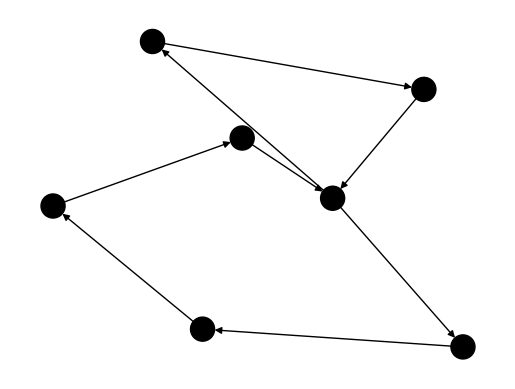

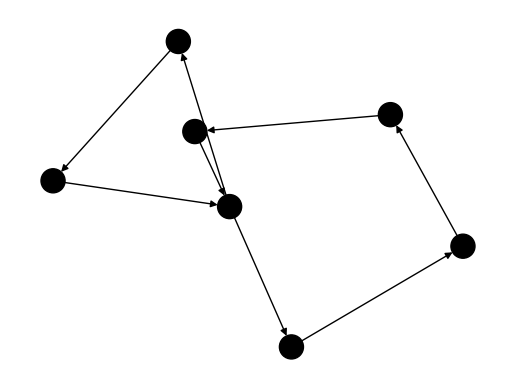

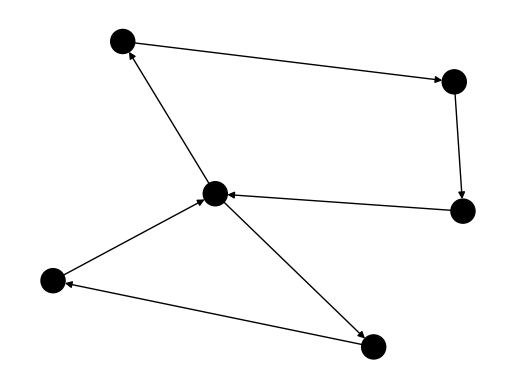

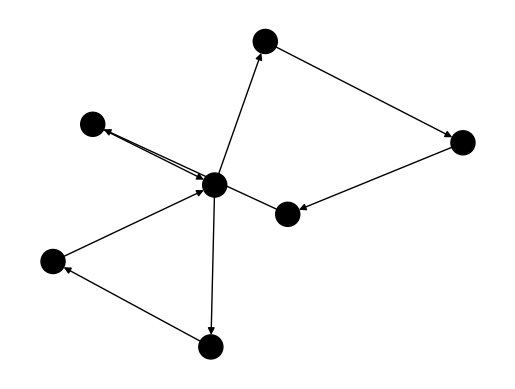

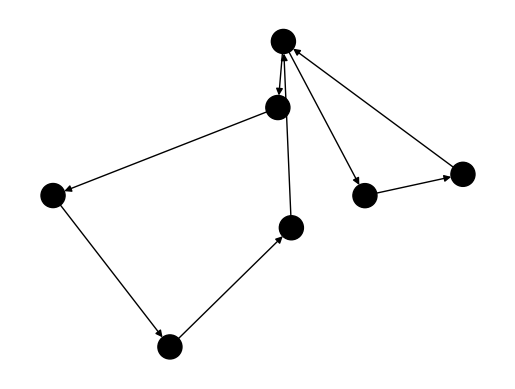

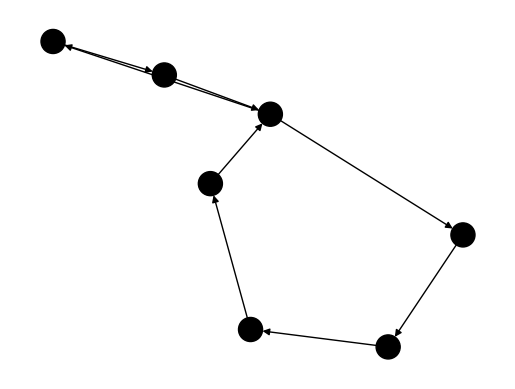

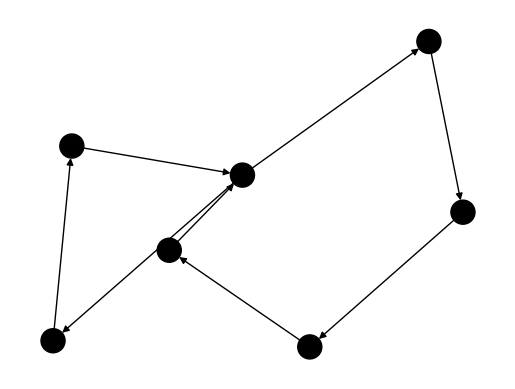

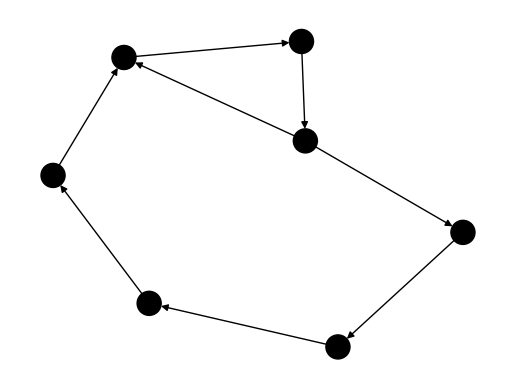

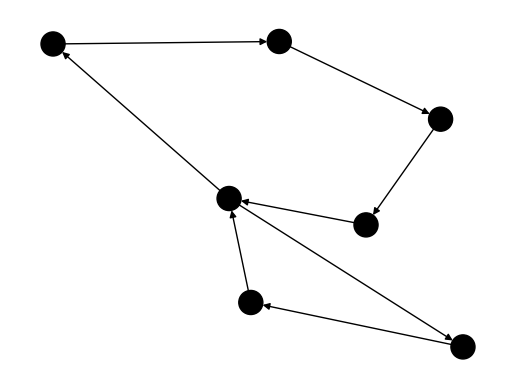

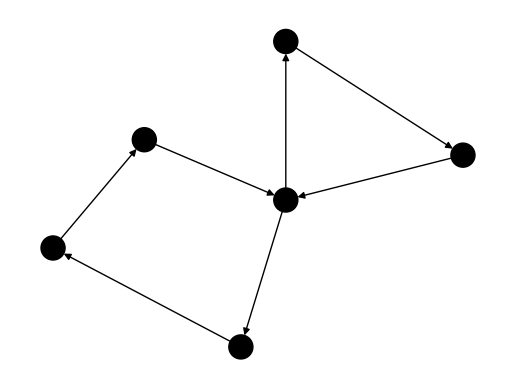

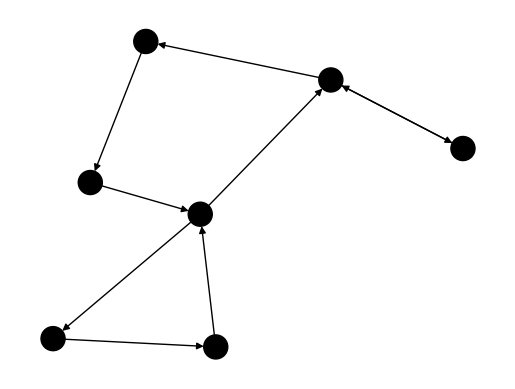

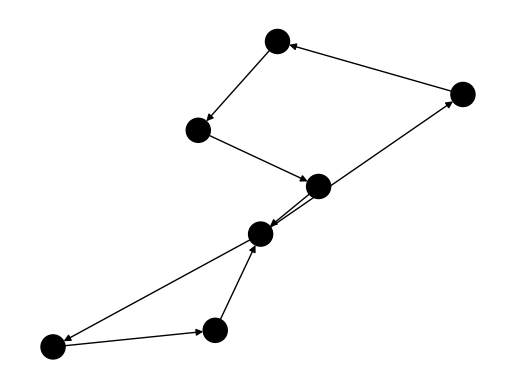

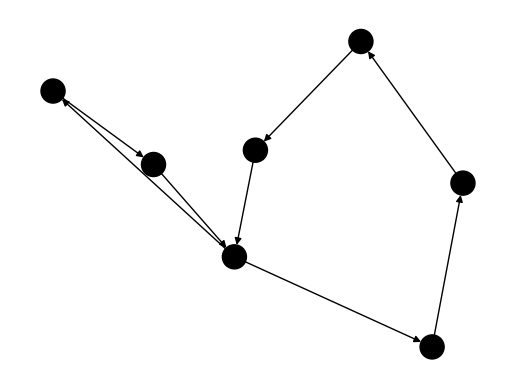

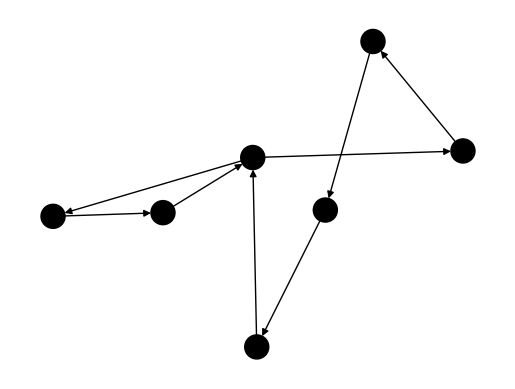

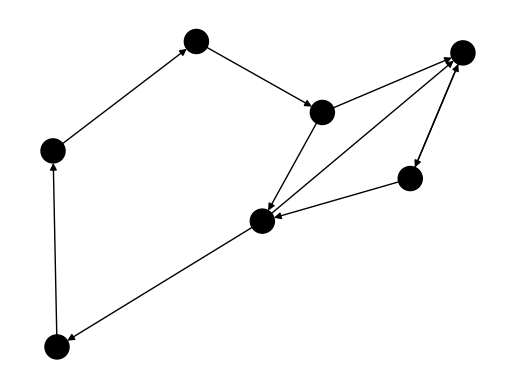

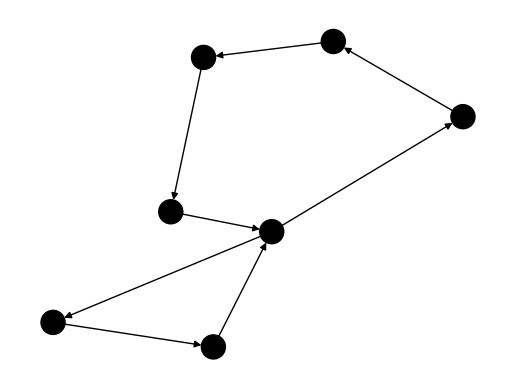

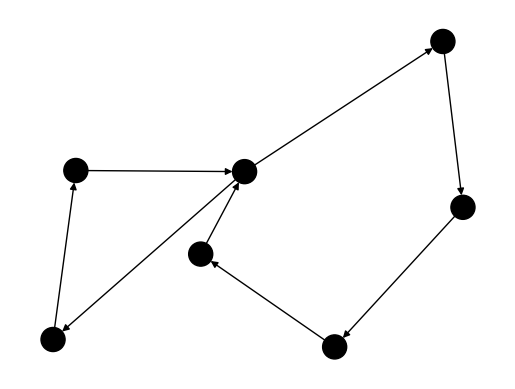

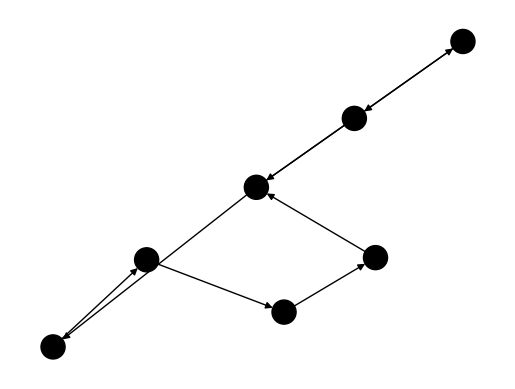

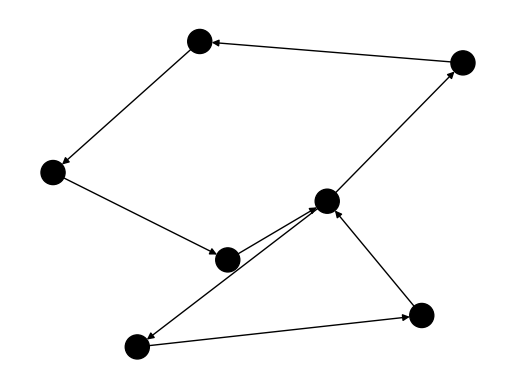

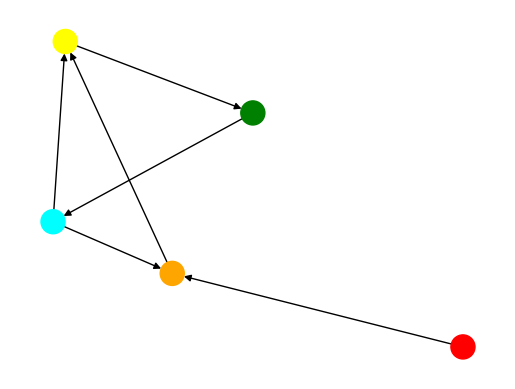

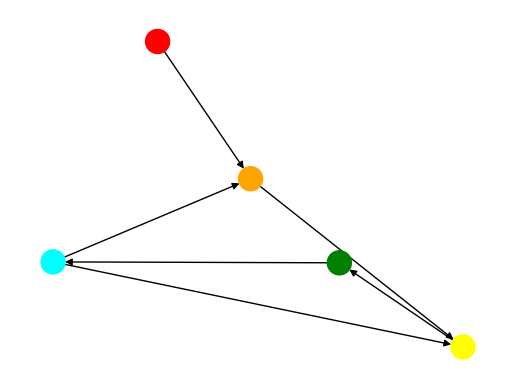

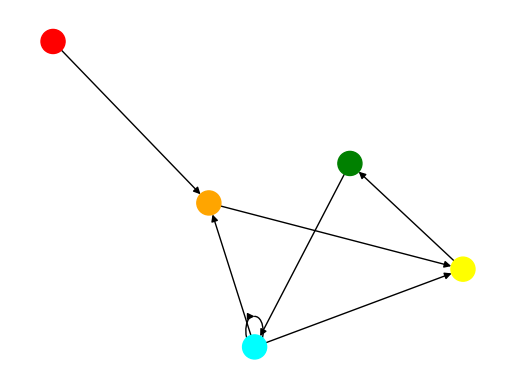

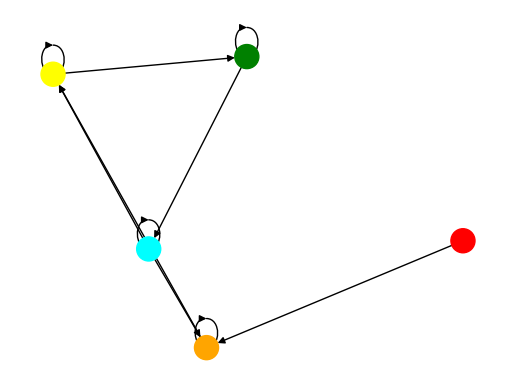

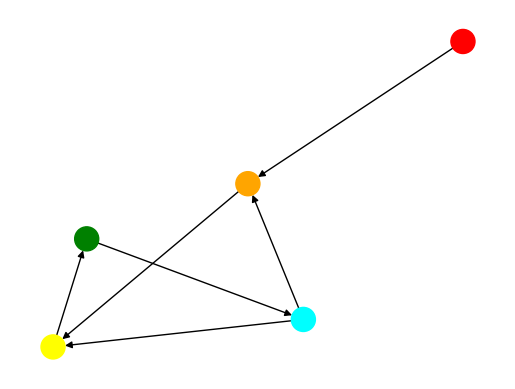

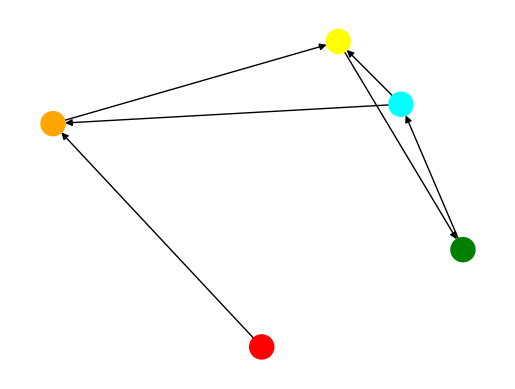

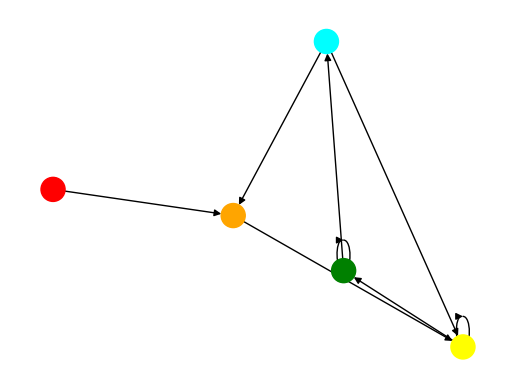

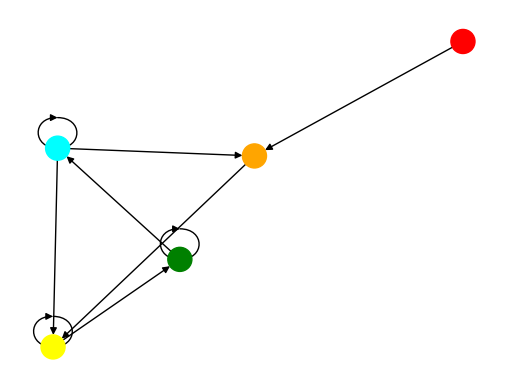

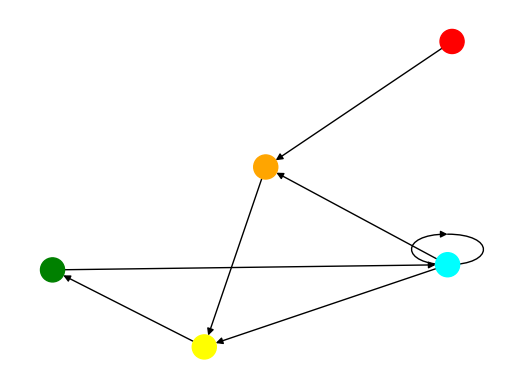

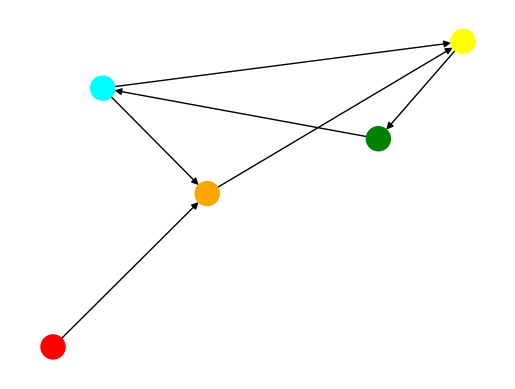

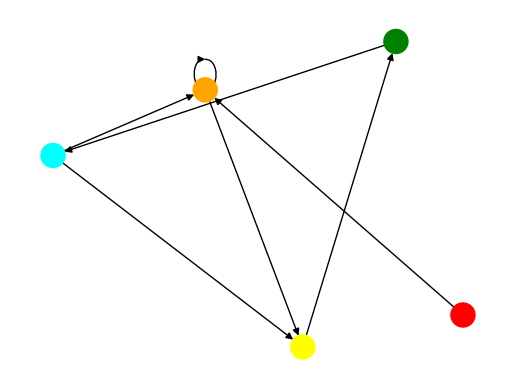

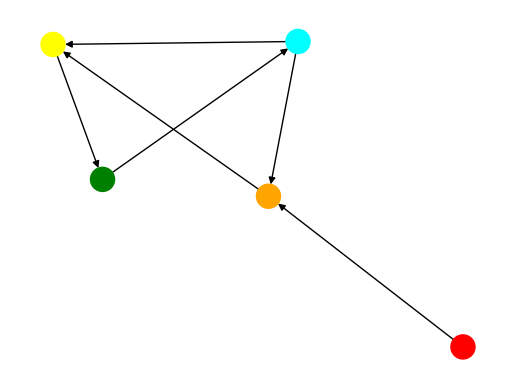

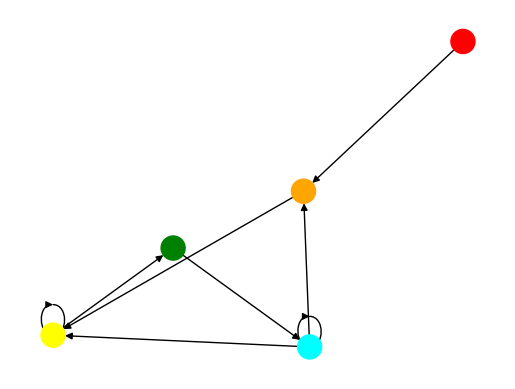

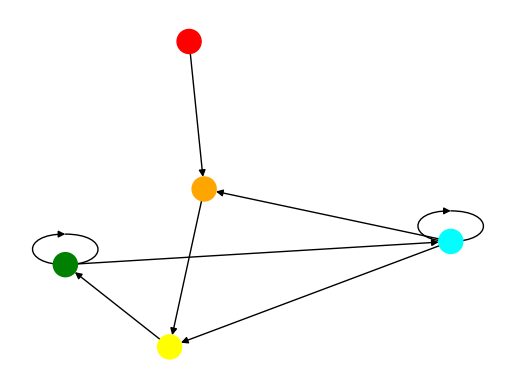

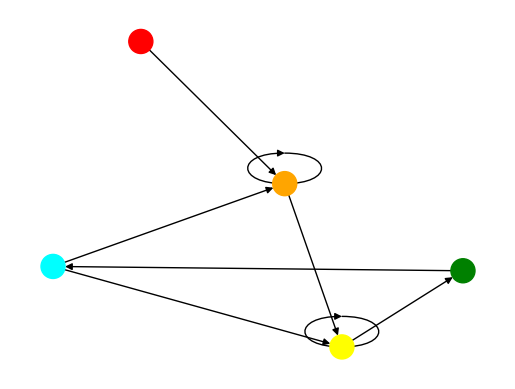

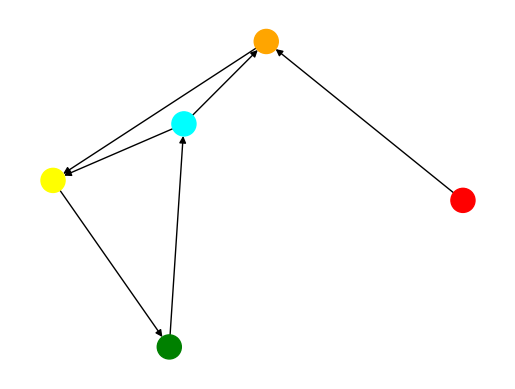

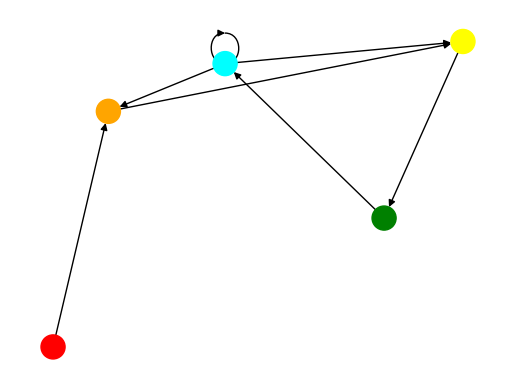

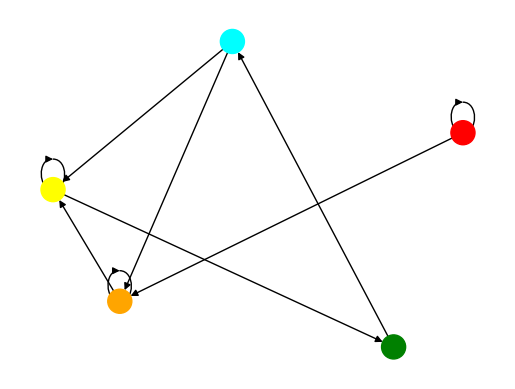

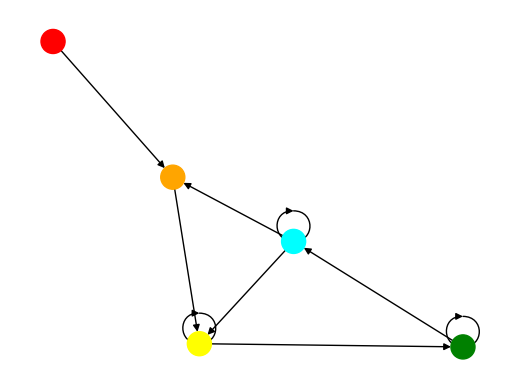

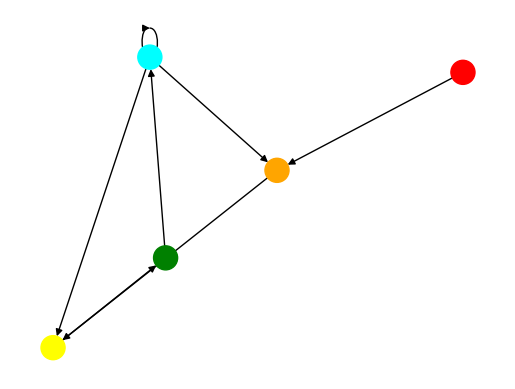

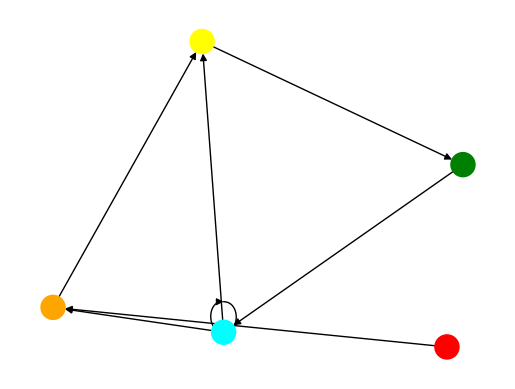

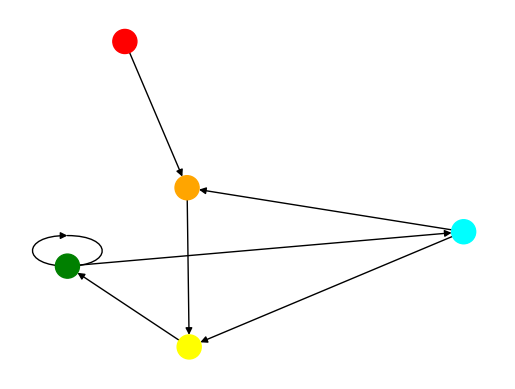

In [10]:
# Path to the logs
# files = ["data3/logs_nome_vlad.json"]
files = all_paths

# Color coding the different elements for the Sankey and Directed graphs
# color_dict = {'Other':'green', 'div.leaflet-pane leaflet-map-pane':'red'}
color_dict = {'Maryland Science Center and Planetarium':'red', 
              'USS Constellation':'orange', 'World Trade Center':'yellow', 
              'National Aquarium':'green', 'USCGC Taney':'cyan', 
              'Pratt Street Pavilion':'blue', 'Light Street Pavilion':'purple',
              'Chesapeake':'pink', 'Other':'black'}

# creating a list to store the generated directed graphs
graphs = {}

# Assembling data into a dictionary from each file
data = {}
for file in files:
    if len(data) == 0:
        data = setup(file, "datetime")
    else:
        data.update( setup(file, "datetime") )
    
for sessID,logs in data.items():
    # creating the directed graph and assigning the previously defined color-code
    (graph, colors) = get_color_graph(logs, color_dict, get_partition)
    f = plt.figure()
    # drawing the di-graph
    nx.draw(graph, pos=nx.spring_layout(graph), node_color=colors, ax=f.add_subplot(111))
    # adding the digraph to our previously defined 'graphs' list.
    graphs[sessID] = graph

In [11]:
print("Example of the name data we want: ", (data['session_1688066755015']['session_16880667550152023-06-29 20:16:38.223000customvisit']['details']['name'] ) ) 

Example of the name data we want:  Maryland Science Center and Planetarium


Now we have all the graphs of temporally sorted logs indexed by their sessions. The next step is turning them into lists to be fed into the model:

First, we get the important information of every log in the session

In [12]:
sess_elements = {}
for sessID,logs in data.items():
    for logID,log in logs.items():
        elem_name = log['details']['name']
        if (not sessID in sess_elements.keys()):
            sess_elements[sessID] = [ elem_name ]
        else:
            sess_elements[sessID] += [ elem_name ]

In [13]:
print("Example of a session list after extracting desired data: ", sess_elements['session_1688066755015'])

Example of a session list after extracting desired data:  ['Maryland Science Center and Planetarium', 'USS Constellation', 'World Trade Center', 'National Aquarium', 'USCGC Taney', 'USS Constellation', 'World Trade Center', 'National Aquarium', 'USCGC Taney', 'World Trade Center', 'National Aquarium', 'USCGC Taney']


7/19/2023 Experiment: Extract all various-length ordered rotations from every workflow's sess_elements to reinforce pattern catching for any length input

In [14]:
def rotate_list(lst, n):
    return lst[n:] + lst[:n]

def all_permutations(lst):
    permutations = []
    for i in range(len(lst)):
        rotated_list = rotate_list(lst, i)
        permutations.append(rotated_list)
    return permutations

input_list = sess_elements['session_1688066755015']
result = all_permutations(input_list)
print( len(result) )


12


In [23]:
def generate_sublists(input_list):
    output_list = []
    n = len(input_list)

    for i in range(n):
        for j in range(i + 1, n + 1):
            sublist = input_list[i:j]
            if len(sublist) > 1:
                output_list.append(sublist)

    return output_list

input_list = [1, 2, 3, 4, 5, 2, 3, 4, 5, 3, 4, 5]
# input_list = sess_elements['session_1688066755015']
result = generate_sublists(input_list)
# print(result)
print(len(result))


66


In [18]:
sess_elements.keys()

dict_keys(['session_1688062135244', 'session_1688062527712', 'session_1688062665568', 'session_1688062750829', 'session_1688062879948', 'session_1688062966308', 'session_1688063048896', 'session_1688063140008', 'session_1688063224368', 'session_1688063292620', 'session_1688063362454', 'session_1688063490579', 'session_1688063559524', 'session_1688063628539', 'session_1688063688832', 'session_1688063804831', 'session_1688063881142', 'session_1688063954012', 'session_1688064116202', 'session_1688066755015', 'session_1688069872181', 'session_1688070017088', 'session_1688070251600', 'session_1688070498337', 'session_1688070732216', 'session_1688070918208', 'session_1688071163806', 'session_1688071507220', 'session_1688071670344', 'session_1688071826405', 'session_1688072022569', 'session_1688072146122', 'session_1688072319034', 'session_1688072552733', 'session_1688072829941', 'session_1688072995158', 'session_1688073150801', 'session_1688073454752', 'session_1688073810660', 'session_16880

## Partitioning

Partitioning can be done a number of ways according to the number of future user interactions ("visit" logs' name elements) we'd like to see. As a general rule of thumb, the model cannot predict a number of interactions more than the number of interactions its given as input (if input is length 7, model can't predict more than the next 7 interactions). This is by the nature of the LSTM model. Thus, I try stretching its capabilities as much as I can with n = len(session list) / 2

In the future, I could fix the limited prediction size with 'dummy' padding elments, have the outputs feed into the model for more outputs, or some other thing so that a greater n-many outputs is possible. But maybe the data we'll eventually have will be rich enough (input-wise) that this won't be a problem?

In [18]:
def split_list(lst):
    length = len(lst)
    middle = length // 2
    if length % 2 == 1:  # If the length is odd
        middle += 1  # Increase the middle index by 1 for the first half
    return (lst[:middle], lst[middle:])

In [24]:
import pandas as pd

# The smallest workflow we have is size 6, so anything less than that gets cut
print("Original # of tasks/sessions: ", len(data))
data = [sess_elements[sessID] for sessID in sess_elements.keys() if len(sess_elements[sessID]) > 5]
print("Refined # of tasks/sessions: ", len(data))

s = set()
for sess_lst in data:
    s.update(sess_lst)
vocab = list(s)
print(vocab)

# Consider reducing the size of data to only have unique workflow lists, too.
# This would greatly reduce the number of repeated lists
all_data = []
for sess_lst in data:
    all_data += generate_sublists(sess_lst)
print(len(all_data))

Original # of tasks/sessions:  41
Refined # of tasks/sessions:  41
['McKeldin Library', 'Reckord Armory', 'Lee Building', 'World Trade Center', 'USS Constellation', 'Mitchell Building', 'USCGC Taney', 'Maryland Science Center and Planetarium', 'Sundial', 'Memorial Chapel', 'Marie Mount Hall', 'National Aquarium']
3475


In [27]:
# Using a specific n value:
# n = 4
# inputs = [s[:-n] for s in data], targets = [s[-n:] for s in data]
# data_tups = [(s[:-n], s[-n:]) for s in data]

# Spliting the list:
data_tups = [(s[:-1], s[-1]) for s in all_data]
# print("data: ", data_tups)
df = pd.DataFrame(data_tups, columns=["inputs", "targets"])
df.head()

,inputs,targets
0,[McKeldin Library],Sundial
1,"[McKeldin Library, Sundial]",Marie Mount Hall
2,"[McKeldin Library, Sundial, Marie Mount Hall]",McKeldin Library
3,"[McKeldin Library, Sundial, Marie Mount Hall, ...",Sundial
4,"[McKeldin Library, Sundial, Marie Mount Hall, ...",Marie Mount Hall


In [29]:
first_row = df.iloc[4]
print(first_row['inputs'])
print(first_row['targets'])

['McKeldin Library', 'Sundial', 'Marie Mount Hall', 'McKeldin Library', 'Sundial']
Marie Mount Hall


## **Model** (Training and Evaluation)

**Working LSTM model:**

Straight-forward approach

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim

class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, input_seq):
        # Initialize hidden state and cell state
        hidden = (torch.zeros(1, 1, self.hidden_size), torch.zeros(1, 1, self.hidden_size))
        
        # Convert input sequence to tensor of indices
        input_idx = [word2idx[w] for w in input_seq]
        input_tensor = torch.tensor(input_idx, dtype=torch.long).unsqueeze(1)
        
        # Embed input tensor
        input_embedded = self.dropout(self.embedding(input_tensor))
        
        # Pass through LSTM layer
        lstm_out, hidden = self.lstm(input_embedded, hidden)
        
        # Pass LSTM output through linear layer to get predicted next word
        output = self.fc(lstm_out.view(len(input_seq), -1))
        return output

vocab += ['Pratt Street Pavilion', 'Light Street Pavilion', 'Chesapeake']
# vocab = ['Canada', 'United States', 'Mexico', 'Brazil', 'Argentina', 'United Kingdom', 'France', 'Germany', 'Poland', 'Turkey', 'Japan', 'Australia', 'Russia', 'China', 'India', 'South Africa', 'Paraguay']
word2idx = {w: i for i, w in enumerate(vocab)}
idx2word = {i: w for i, w in enumerate(vocab)}

# Define the model
lstm = LSTM(input_size=len(vocab), hidden_size=len(vocab), output_size=len(vocab))
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lstm.parameters())

for epoch in range(1001):
    for i,t in data_tups:
        lstm.zero_grad()
        hidden = (torch.zeros(1, 1, lstm.hidden_size), torch.zeros(1, 1, lstm.hidden_size))  # update hidden
        output = lstm(i)
        predicted_idx = output[-1].unsqueeze(0)
        target_idx = torch.tensor([word2idx[t]], dtype=torch.long)
        loss = loss_fn(predicted_idx, target_idx)
        loss.backward()
        optimizer.step()
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

Epoch 0, Loss: 0.1480374038219452
Epoch 100, Loss: 0.5159148573875427
Epoch 200, Loss: 0.20787937939167023
Epoch 300, Loss: 0.08162594586610794
Epoch 400, Loss: 0.10870985686779022
Epoch 500, Loss: 0.05691412463784218
Epoch 600, Loss: 0.06554065644741058
Epoch 700, Loss: 0.17544205486774445
Epoch 800, Loss: 0.18943221867084503
Epoch 900, Loss: 0.09659823775291443
Epoch 1000, Loss: 0.09560709446668625


Attempting the same as before, but **now with k-fold validation to get the best trained model:**

In [22]:
# import random
# import sys

# # Shuffle data tuples
# random.shuffle(data_tups)

# # Define the number of folds
# k = 5

# # Divide data tuples into k subsets of equal size
# subset_size = len(data_tups) // k
# data_subsets = [data_tups[i:i+subset_size] for i in range(0, len(data_tups), subset_size)]

# best_loss = float(sys.maxsize)
# best_lstm = LSTM(input_size=len(vocab), hidden_size=len(vocab), output_size=len(vocab))
# best_val_fold = []
# best_train_fold = []
# # Train and validate model on each subset
# for fold in range(k):
#     # Define the model
#     lstm = LSTM(input_size=len(vocab), hidden_size=len(vocab), output_size=len(vocab))
#     loss_fn = nn.CrossEntropyLoss()
#     optimizer = torch.optim.Adam(lstm.parameters())

#     # Get the training and validation data for this fold
#     val_data = data_subsets[fold]
#     train_data = [tup for i, subset in enumerate(data_subsets) for tup in subset if i != fold]

#     # Train the model on the training data
#     for epoch in range(1001):
#         for i,t in train_data:
#             lstm.zero_grad()
#             hidden = (torch.zeros(1, 1, lstm.hidden_size), torch.zeros(1, 1, lstm.hidden_size))  # update hidden
#             output = lstm(i)
#             predicted_idx = output[-1].unsqueeze(0)
#             target_idx = torch.tensor([word2idx[t]], dtype=torch.long)
#             loss = loss_fn(predicted_idx, target_idx)
#             loss.backward()
#             optimizer.step()

#         if epoch % 100 == 0:
#             print(f"Fold {fold+1}, Epoch {epoch}, Training Loss: {loss.item()}")

#     # Evaluate the model on the validation data
#     val_loss = 0
#     with torch.no_grad():
#         for i,t in val_data:
#             hidden = (torch.zeros(1, 1, lstm.hidden_size), torch.zeros(1, 1, lstm.hidden_size))  # update hidden
#             output = lstm(i)
#             predicted_idx = output[-1].unsqueeze(0)
#             target_idx = torch.tensor([word2idx[t]], dtype=torch.long)
#             loss = loss_fn(predicted_idx, target_idx)
#             val_loss += loss.item()
    
#     val_loss /= len(val_data)
#     if val_loss < best_loss:
#         best_loss = val_loss
#         best_lstm = lstm
#         best_val_fold = val_data
#         best_train_fold = train_data
    
#     print(f"Fold {fold+1}, Validation Loss: {val_loss}")
#     print()

# torch.save(best_lstm, 'model_2.pth')

Fold 1, Epoch 0, Training Loss: 2.855060577392578
Fold 1, Epoch 100, Training Loss: 0.3849022686481476
Fold 1, Epoch 200, Training Loss: 0.3612093925476074
Fold 1, Epoch 300, Training Loss: 0.3257828652858734
Fold 1, Epoch 400, Training Loss: 0.36552050709724426
Fold 1, Epoch 500, Training Loss: 0.3315739929676056
Fold 1, Epoch 600, Training Loss: 0.3663445711135864
Fold 1, Epoch 700, Training Loss: 0.3366739749908447
Fold 1, Epoch 800, Training Loss: 0.3894546926021576
Fold 1, Epoch 900, Training Loss: 0.3440380394458771
Fold 1, Epoch 1000, Training Loss: 0.34125590324401855
Fold 1, Validation Loss: 0.5031444914638996

Fold 2, Epoch 0, Training Loss: 2.6861202716827393
Fold 2, Epoch 100, Training Loss: 0.5658767819404602
Fold 2, Epoch 200, Training Loss: 0.3773609697818756
Fold 2, Epoch 300, Training Loss: 0.4074110984802246
Fold 2, Epoch 400, Training Loss: 0.4566088914871216
Fold 2, Epoch 500, Training Loss: 0.33519598841667175
Fold 2, Epoch 600, Training Loss: 0.31842920184135437
F

## Model Performance

In [23]:
# import torch

# best_lstm = torch.load('model_3.pth')

# # print("Size of the validation set for our confusion matrix: ", len(best_val_fold))

Size of the validation set for our confusion matrix:  8


Attempted to make a confusion matrix, but output can't be modelled as such when there's so many possibilties of multi-dimensional outputs.

In the following confusion matrix, we are displaying where the validation set's true labels intersect/diverge from the model's predictions. More shaded boxes and values **on the diagonal** means the model is making the **correct predictions**. More shaded boxes and values **anywhere else** means the **model is confused** with some of the validation set's inputs on what the right prediction should be.

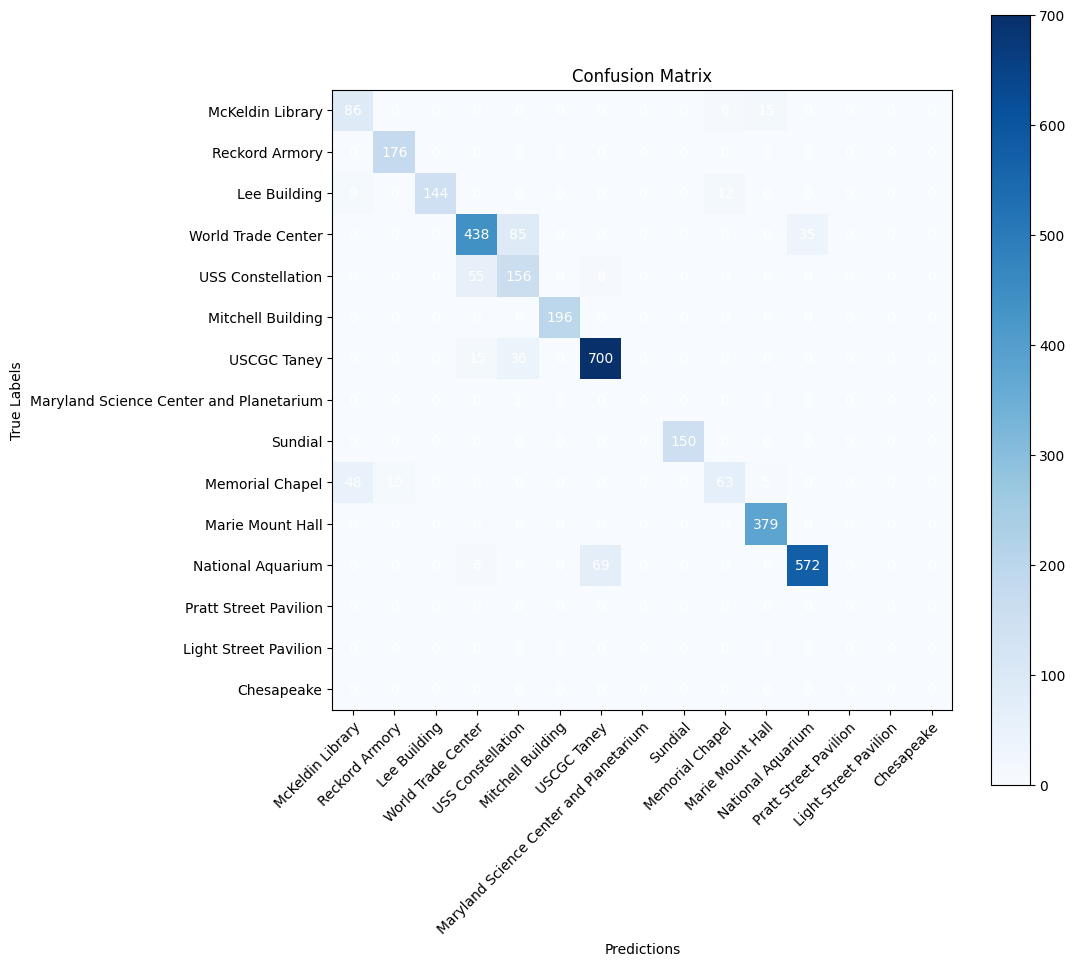

In [32]:
# Create the confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# Set the model to evaluation mode
lstm.eval()

# Create variables to store predictions and ground truth labels
predictions = []
labels = []
# Loop through the test dataset and make predictions
for i, t in data_tups:
    output = lstm(i)
    predicted_idx = torch.argmax(output[-1]).item()
    predicted_label = idx2word[predicted_idx]
    label = t
    predictions.append(predicted_label)
    labels.append(label)

conf_mat = confusion_matrix(labels, predictions, labels=vocab)
# Print the confusion matrix
# print(np.array2string(conf_mat, separator=', '))

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(conf_mat, cmap='Blues')

# Set ticks for x and y axis
ax.set_xticks(np.arange(len(vocab)))
ax.set_yticks(np.arange(len(vocab)))

# Set labels for x and y axis
ax.set_xlabel('Predictions')
ax.set_ylabel('True Labels')
ax.set_xticklabels(vocab)
ax.set_yticklabels(vocab)

# Rotate the x-axis labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over the data and create annotations for each cell
for i in range(len(vocab)):
    for j in range(len(vocab)):
        text = ax.text(j, i, conf_mat[i, j], ha="center", va="center", color="w")

# Set title and colorbar
ax.set_title("Confusion Matrix")
fig.colorbar(im)
plt.show()

Some specific expected model targets for their respective inputs:

In [33]:
# Test the model on a new input sequence
# ['Maryland Science Center and Planetarium', 'USS Constellation', 'World Trade Center', 'National Aquarium']
input_seqs = [['Maryland Science Center and Planetarium', 'USS Constellation', 'World Trade Center', 'National Aquarium', 'USCGC Taney', 'USS Constellation'], ['McKeldin Library', 'Sundial', 'Marie Mount Hall', 'McKeldin Library', 'Sundial', 'Marie Mount Hall']]
for i in input_seqs:
    output = lstm(i)
    predicted_idx = torch.argmax(output[-1]).item()
    predicted_word = idx2word[predicted_idx]
    print(f'Input sequence: {i}, Predicted next word: {predicted_word}')
# Should be ['World Trade Center', 'National Aquarium', 'USCGC Taney', 'World Trade Center', 'National Aquarium', 'USCGC Taney']
# Should be ['Memorial Chapel', 'Lee Building', 'Reckord Armory', 'Mitchell Building', 'Marie Mount Hall, (McKeldin/Memorial Chapel)']

Input sequence: ['Maryland Science Center and Planetarium', 'USS Constellation', 'World Trade Center', 'National Aquarium', 'USCGC Taney', 'USS Constellation'], Predicted next word: World Trade Center
Input sequence: ['McKeldin Library', 'Sundial', 'Marie Mount Hall', 'McKeldin Library', 'Sundial', 'Marie Mount Hall'], Predicted next word: Memorial Chapel


An interesting thing of note here is that, instead of cycling back to McKeldin or Memorial Chapel (as it should in the workflow graph), the next node the model predicts for Liam's workflow is 'Mitchell Building'. As if completely random. This needs looking into.

So the expected targets are hit when the model is given the right inputs. But what about other inputs?

In [34]:
input_seqs = [['Maryland Science Center and Planetarium', 'World Trade Center', 'National Aquarium'], ['USCGC Taney', 'Maryland Science Center and Planetarium', 'World Trade Center', 'National Aquarium'], ['USCGC Taney', 'Pratt Street Pavilion', 'Light Street Pavilion', 'Chesapeake'], ['Pratt Street Pavilion', 'Light Street Pavilion', 'Chesapeake']]
for i in input_seqs:
    output = lstm(i)
    predicted_idx = torch.argmax(output[-1]).item()
    predicted_word = idx2word[predicted_idx]
    print(f'Input sequence: {i}, Predicted next word: {predicted_word}')
#Should expect: USCGC Taney for all of them, because that's the only output there can be right now

Input sequence: ['Maryland Science Center and Planetarium', 'World Trade Center', 'National Aquarium'], Predicted next word: USCGC Taney
Input sequence: ['USCGC Taney', 'Maryland Science Center and Planetarium', 'World Trade Center', 'National Aquarium'], Predicted next word: USCGC Taney
Input sequence: ['USCGC Taney', 'Pratt Street Pavilion', 'Light Street Pavilion', 'Chesapeake'], Predicted next word: McKeldin Library
Input sequence: ['Pratt Street Pavilion', 'Light Street Pavilion', 'Chesapeake'], Predicted next word: Lee Building


Why does it keep cycling backwards between 'National Aquarium' and 'World Trade Center'? And it aparently mixes in 'Memorial Chapel' when given random Baltimore workflow nodes? This needs to be fixed.

As we can see, it doesn't follow the workflow sequence and there's still work to do. We will see if we can fix this with different data or a tweaked model.